# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load dataset

In [20]:
# Step 1: Load dataset with proper timezone handling
df = pd.read_csv("World-Stock-Prices-Dataset.csv", parse_dates=["Date"])

# Convert tz-aware datetimes to UTC, then drop tz info
df["Date"] = pd.to_datetime(df["Date"], utc=True).dt.tz_convert(None)


print(df.head())
print("Available tickers:", df["Ticker"].unique())

                 Date        Open        High         Low       Close  \
0 2025-07-03 04:00:00    6.630000    6.740000    6.615000    6.640000   
1 2025-07-03 04:00:00  106.750000  108.370003  106.330101  107.339996   
2 2025-07-03 04:00:00  122.629997  123.050003  121.550003  121.930000   
3 2025-07-03 04:00:00  221.705002  224.009995  221.360001  223.410004   
4 2025-07-03 04:00:00  212.145004  214.649994  211.810104  213.550003   

     Volume Brand_Name Ticker Industry_Tag  Country  Dividends  Stock Splits  \
0   4209664    peloton   PTON      fitness      usa        0.0           0.0   
1    560190      crocs   CROX     footwear      usa        0.0           0.0   
2     36600     adidas  ADDYY      apparel  germany        0.0           0.0   
3  29295154     amazon   AMZN   e-commerce      usa        0.0           0.0   
4  34697317      apple   AAPL   technology      usa        0.0           0.0   

   Capital Gains  
0            NaN  
1            NaN  
2            NaN  
3   

# Step 2: Select one stock

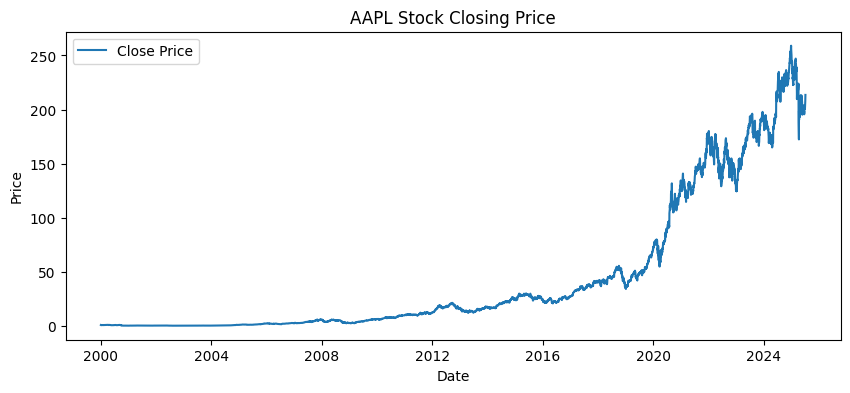

In [21]:
TICKER = "AAPL"   # change to any ticker you want
stock = df[df["Ticker"] == TICKER].copy()

# Keep only Date + Close
stock = stock[["Date", "Close"]].set_index("Date").sort_index()

plt.figure(figsize=(10,4))
plt.plot(stock.index, stock["Close"], label="Close Price")
plt.title(f"{TICKER} Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 3: ARIMA Forecasting


--- ARIMA Evaluation ---
RMSE: 94.85578228894859
MAE: 84.29802828948158


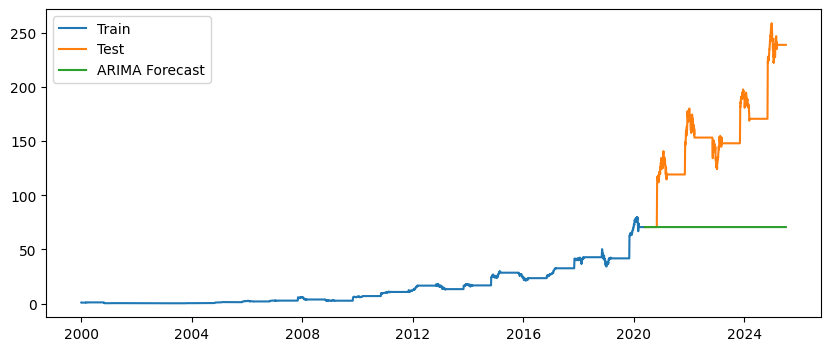

In [31]:
# Ensure unique + freq-aware index
stock = stock[~stock.index.duplicated(keep="last")]
stock = stock.asfreq("B").ffill()

# Train/test split
train_size = int(len(stock) * 0.8)
train, test = stock.iloc[:train_size], stock.iloc[train_size:]

model = ARIMA(train["Close"], order=(5,1,0))
model_fit = model.fit()

# Forecast
preds_arima = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Align forecast with test dates
preds_arima.index = test.index

# Evaluate
rmse = np.sqrt(mean_squared_error(test["Close"], preds_arima))
mae = mean_absolute_error(test["Close"], preds_arima)
print("\n--- ARIMA Evaluation ---")
print("RMSE:", rmse)
print("MAE:", mae)

# Plot
plt.figure(figsize=(10,4))
plt.plot(train.index, train["Close"], label="Train")
plt.plot(test.index, test["Close"], label="Test")
plt.plot(preds_arima.index, preds_arima, label="ARIMA Forecast")
plt.legend()
plt.show()

# Step 4: LSTM Forecasting

Epoch 1/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - loss: 1.2860e-04 - val_loss: 1.8063e-04
Epoch 2/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - loss: 2.9420e-05 - val_loss: 1.0053e-04
Epoch 3/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - loss: 2.7901e-05 - val_loss: 9.9365e-05
Epoch 4/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 3.0417e-05 - val_loss: 9.5043e-05
Epoch 5/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - loss: 2.3373e-05 - val_loss: 1.7408e-04
Epoch 6/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - loss: 2.2001e-05 - val_loss: 8.6955e-05
Epoch 7/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - loss: 1.9777e-05 - val_loss: 2.3377e-04
Epoch 8/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 2.0230e-05 - val_loss: 1.1121e-04
Epoch 9/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 2.0597e-05 - val_loss: 7.7478e-05
Epoch 10/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 2.0822e-05 - val_loss: 7.5750e-05
Epoch 11/20
149/149 ━━━━━━━━━━━━━━━━━━━

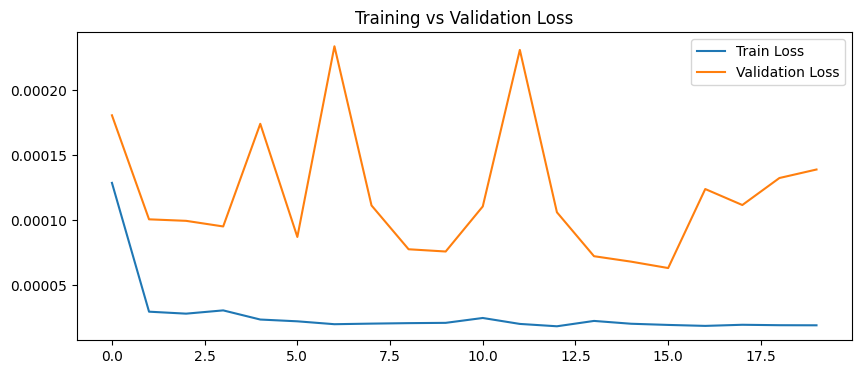

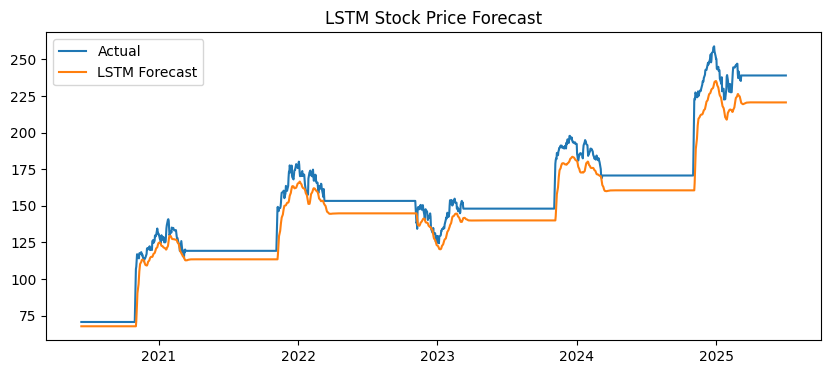

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━

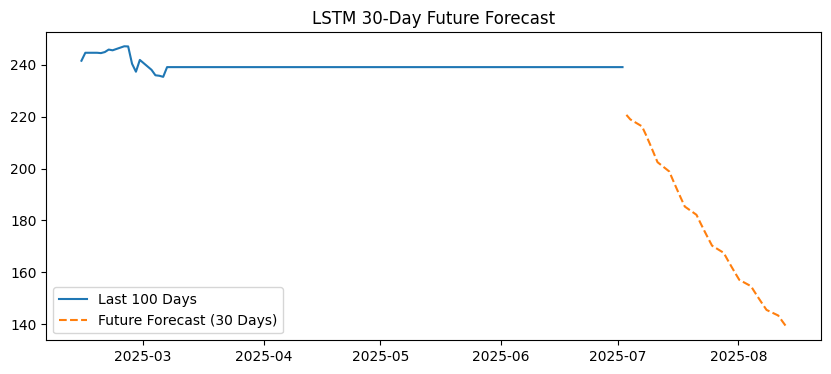

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import Input

# -----------------------------
# Step 1: Fix duplicates & frequency
# -----------------------------
stock = stock[~stock.index.duplicated(keep="last")]
stock = stock.asfreq("B").ffill()

# -----------------------------
# Step 2: Scale Close prices
# -----------------------------
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(stock[["Close"]])

# -----------------------------
# Step 3: Create sequences
# -----------------------------
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data)-window):
        X.append(data[i:i+window, 0])
        y.append(data[i+window, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled, window_size)

# Train/test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# -----------------------------
# Step 4: Build LSTM
# -----------------------------
model = Sequential([
    Input(shape=(window_size, 1)),   #  define input shape here
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")

# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_split=0.1, verbose=1)

# -----------------------------
# Step 5: Predict & Inverse Scale
# -----------------------------
preds_lstm = model.predict(X_test)
preds_lstm = scaler.inverse_transform(preds_lstm)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

# -----------------------------
# Step 6: Evaluate
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test_inv, preds_lstm))
mae = mean_absolute_error(y_test_inv, preds_lstm)
print("\n--- LSTM Evaluation ---")
print("RMSE:", rmse)
print("MAE:", mae)

# -----------------------------
# Step 7: Plots
# -----------------------------
# Loss curve
plt.figure(figsize=(10,4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# Predictions vs Actual
plt.figure(figsize=(10,4))
plt.plot(stock.index[-len(y_test):], y_test_inv, label="Actual")
plt.plot(stock.index[-len(y_test):], preds_lstm, label="LSTM Forecast")
plt.title("LSTM Stock Price Forecast")
plt.legend()
plt.show()

# -----------------------------
# Step 8: Future Forecast (next 30 business days)
# -----------------------------
last_sequence = scaled[-window_size:]
future_preds = []

current_seq = last_sequence.copy()

for _ in range(30):
    pred = model.predict(current_seq.reshape(1, window_size, 1))
    future_preds.append(pred[0,0])
    current_seq = np.append(current_seq[1:], pred)[-window_size:].reshape(-1,1)

future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1,1))

# Future index
future_dates = pd.date_range(stock.index[-1] + pd.offsets.BDay(1), periods=30, freq="B")

# Plot future forecast
plt.figure(figsize=(10,4))
plt.plot(stock.index[-100:], stock["Close"].tail(100), label="Last 100 Days")
plt.plot(future_dates, future_preds, label="Future Forecast (30 Days)", linestyle="--")
plt.title("LSTM 30-Day Future Forecast")
plt.legend()
plt.show()
